Import packages

In [22]:
import env_methods as em
import vis_methods as vis
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import math
import time

Basic parameters

In [3]:
#Define bounding box in North America
lat_start = 0
lat_end = 90
lon_start = -179
lon_end =  -30

#Data paths
main_path = r'C:\Users\bpara\Geo data'

temps_path = r'\temp'
mean_path = r'\geopotential mean'
wind_path = r'\wind'

#Time stuff
month_to_show = 5 #What number of month to show, 0 = Dec 1843, 1 = Jan 1844, 2 = Feb 1844...

Import data

In [8]:
temp_data = em.get_data(main_path+temps_path, False, [12, 1843, 12, 1844])
mean_data = em.get_data(main_path+mean_path, False, [12, 1843, 12, 1844])
wind_data = em.get_data(main_path+wind_path, False, [12, 1843, 12, 1844])

acquring data from air.2m.mon.mean.nc
acquring data from hgt.mon.mean.nc
acquring data from uwnd.mon.mean.nc
acquring data from vwnd.mon.mean.nc


Draw the mapping

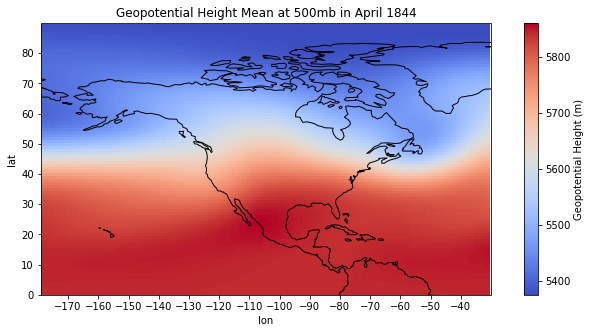

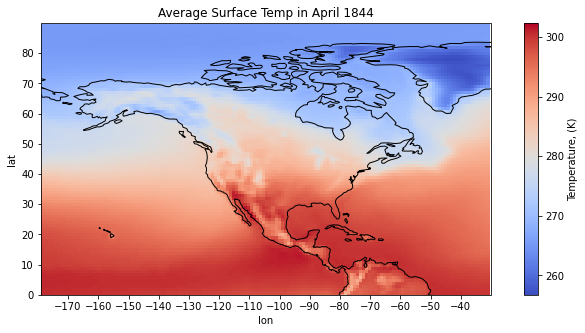

In [14]:
def plot_data(lon, lat, data, scalebar, title, lon_min = 0, lon_max = 359, lat_min = -90, lat_max = 90): 
    fig = plt.figure(figsize = (12, 5))
    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 0))
    ax.coastlines()
    
    lat1 = em.find_closest_val(lat_min, lat)
    lat2 = em.find_closest_val(lat_max, lat)
    
    ax.set_extent((lon_min, lon_max, lat_min, lat_max))
    ax.set_xticks(lon[math.ceil(lon_min / 10) * 10:lon_max][::10], crs = ccrs.PlateCarree())
    ax.set_yticks(lat[math.ceil(lat1 / 10) * 10:lat2][::10], crs = ccrs.PlateCarree())
    plt.xlabel('lon')
    plt.ylabel('lat')
    plt.title(title)
    
    mesh = plt.pcolormesh(lon[lon_min:lon_max], 
                          lat[lat1:lat2], 
                          data[lat1:lat2, lon_min:lon_max], 
                          cmap="coolwarm")
    cbar = plt.colorbar(mesh)
    cbar.set_label(scalebar)

plot_data(mean_data["lon"], mean_data["lat"], mean_data["nc_vars"]["hgt"][month_to_show][2], 
          "Geopotential Height (m)", "Geopotential Height Mean at 500mb in April 1844", lon_start, lon_end, lat_start, lat_end)
plot_data(temp_data["lon"], temp_data["lat"], temp_data["nc_vars"]["air"][month_to_show], "Temperature, (K)", 
          "Average Surface Temp in April 1844", lon_start, lon_end, lat_start, lat_end)

And now for vector wind

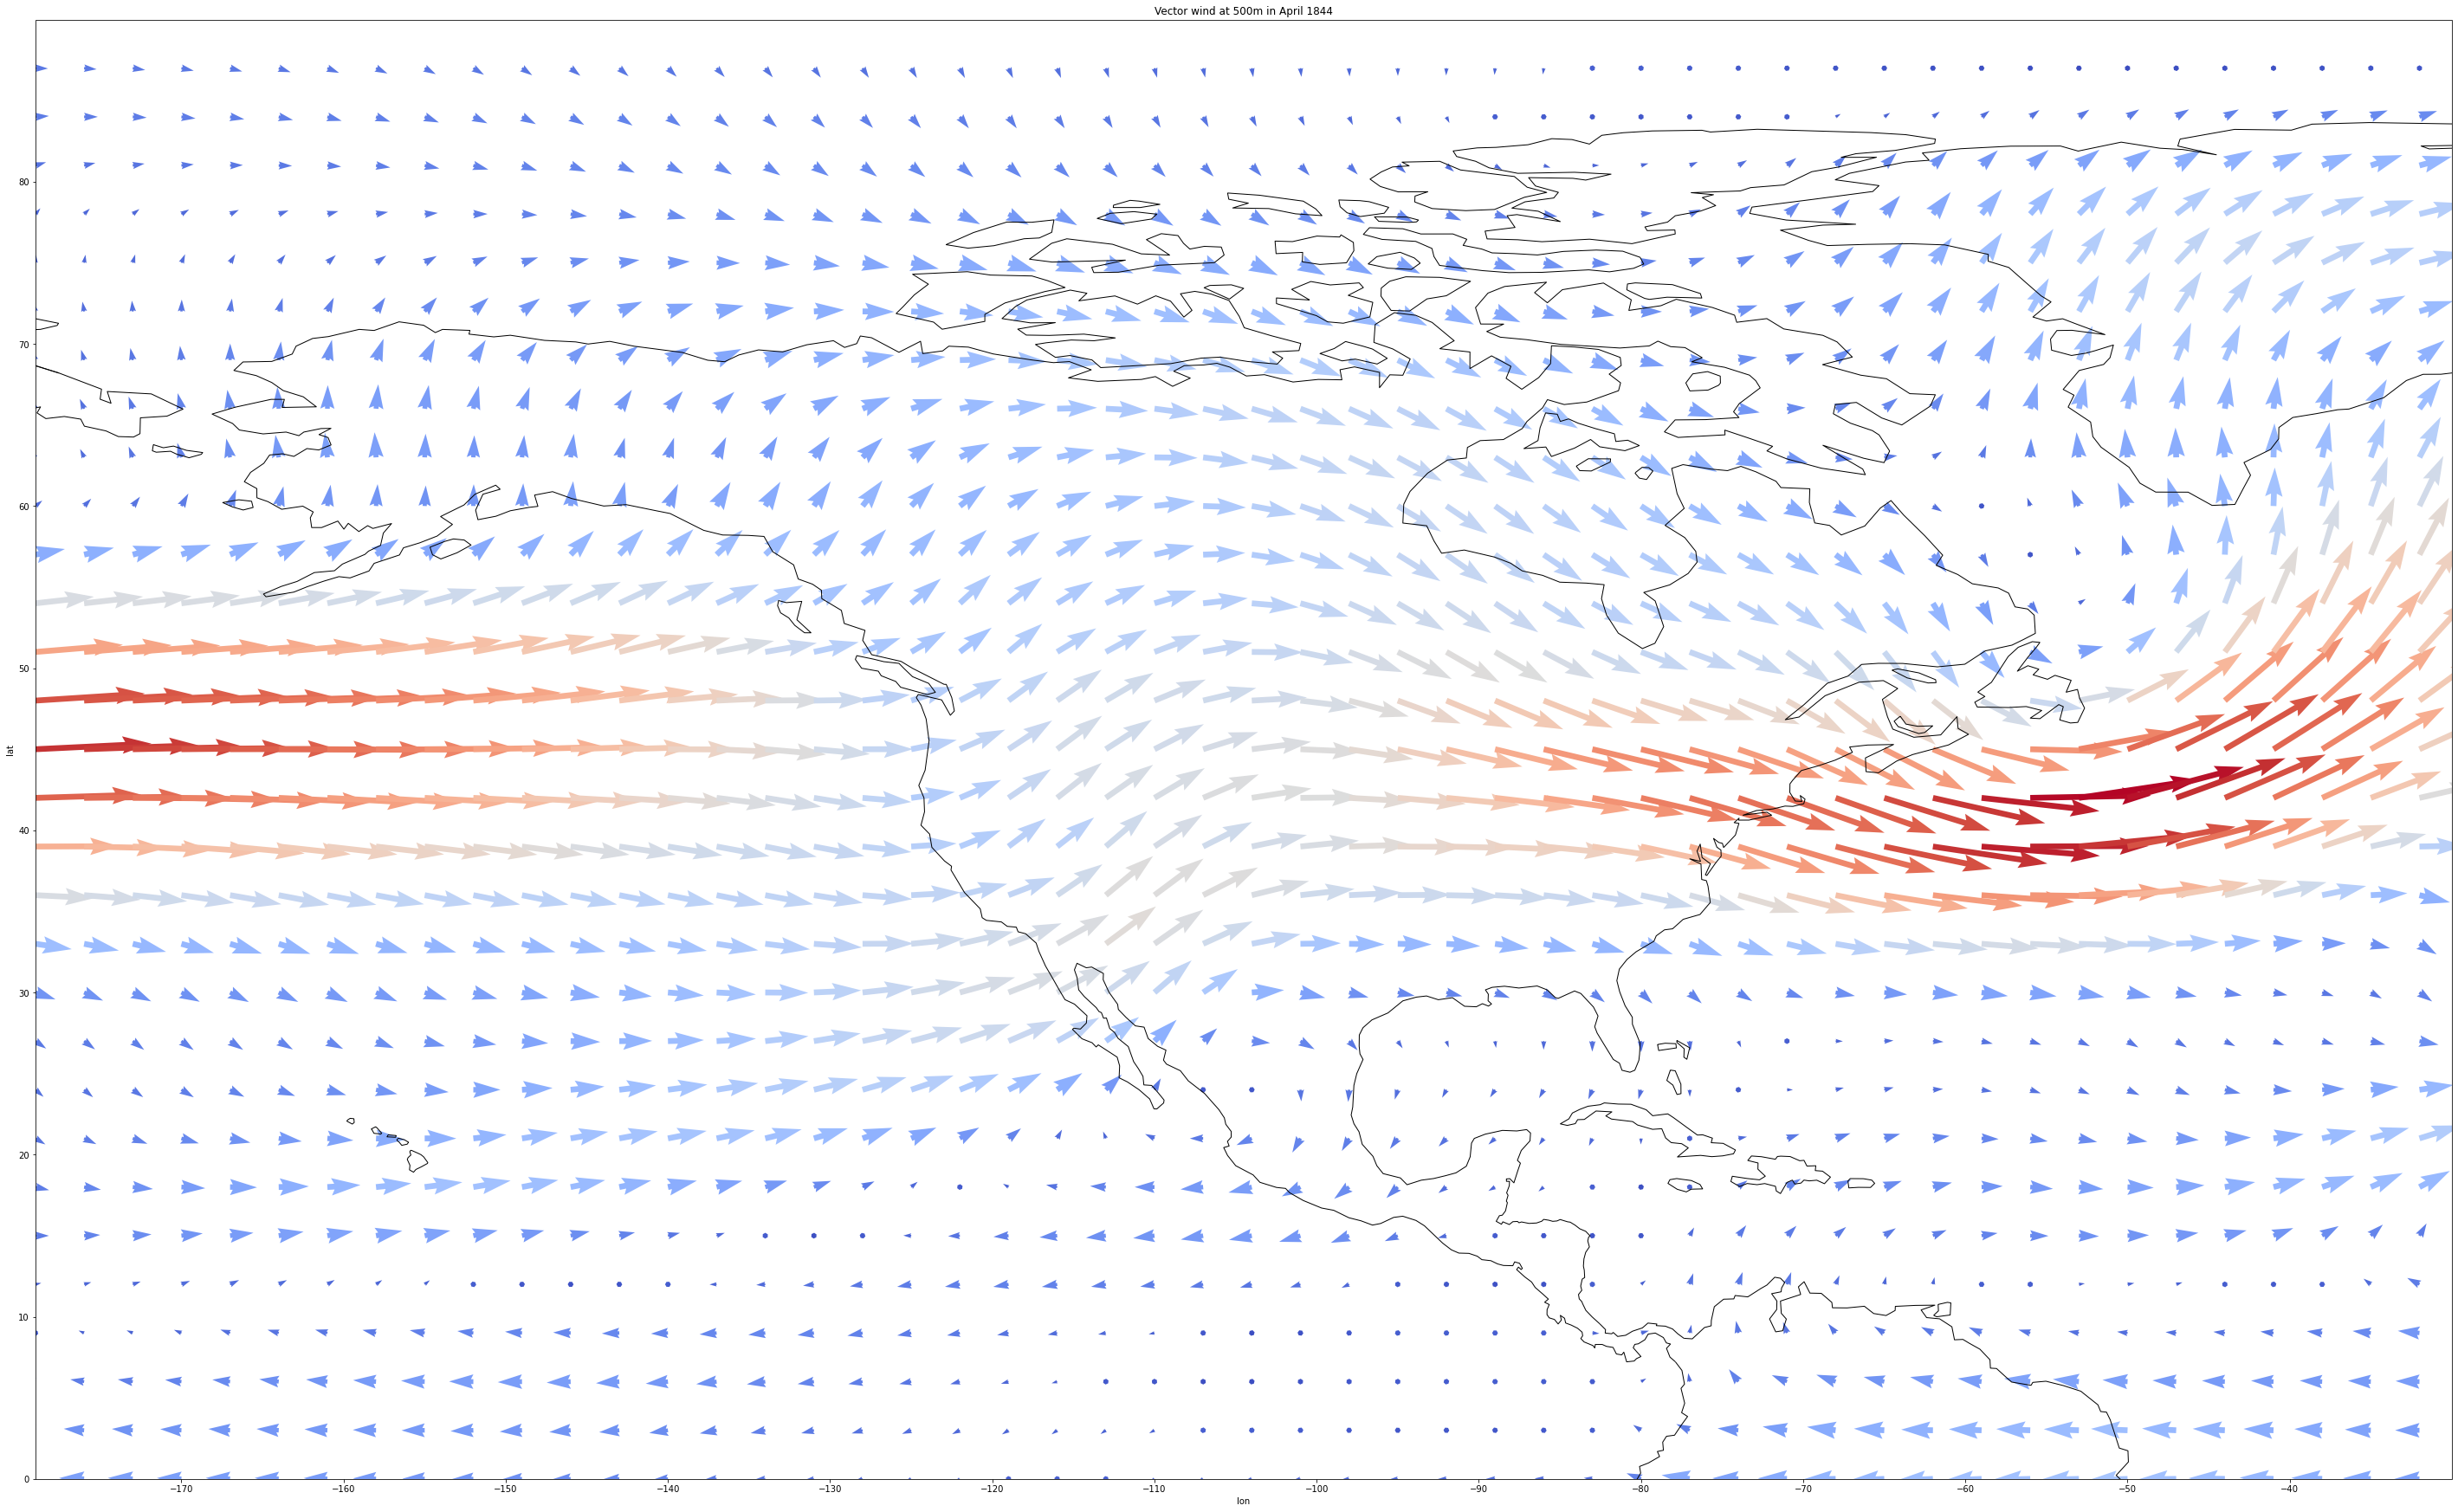

In [53]:
def plot_vector_data(lon, lat, x_data, y_data, title, lon_min = 0, lon_max = 359, lat_min = -90, lat_max = 90, detail=3):
    fig = plt.figure(figsize = (50, 50))
    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 0))
    ax.coastlines()
    
    lat1 = em.find_closest_val(lat_min, lat)
    lat2 = em.find_closest_val(lat_max, lat)
    
    ax.set_extent((lon_min, lon_max, lat_min, lat_max))
    ax.set_xticks(lon[math.ceil(lon_min / 10) * 10:lon_max][::10], crs = ccrs.PlateCarree())
    ax.set_yticks(lat[math.ceil(lat1 / 10) * 10:lat2][::10], crs = ccrs.PlateCarree())
    plt.xlabel('lon')
    plt.ylabel('lat')
    plt.title(title)
    
    color = np.hypot(x_data[lat1:lat2, lon_min:lon_max][::detail, ::detail], 
                     y_data[lat1:lat2, lon_min:lon_max][::detail, ::detail])
    v_field = plt.quiver(lon[lon_min:lon_max][::detail], 
                          lat[lat1:lat2][::detail],
                        x_data[lat1:lat2, lon_min:lon_max][::detail, ::detail],
                        y_data[lat1:lat2, lon_min:lon_max][::detail, ::detail], color, cmap="coolwarm", scale = 400)
plot_vector_data(wind_data["lon"], wind_data["lat"], wind_data["nc_vars"]["uwnd"][month_to_show][2], 
                 wind_data["nc_vars"]["vwnd"][month_to_show][2], "Vector wind at 500m in April 1844", 
                 lon_start, lon_end, lat_start, lat_end)